<a href="https://colab.research.google.com/github/himabindu-thota/W207-AppliedML-final-project/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_data(filename):
  df = pd.read_csv(filename, parse_dates=['Date'])
  return df

In [4]:
def get_total_na(df):
  return df.isna().any(axis=1).sum()

In [5]:
def initialize_df(df):
  print("Initial index ", df.index)
  print("dtypes ", df.dtypes)
  print("Set index to Date")
  df.set_index("Date", inplace=True)

In [6]:
def summary(df):
  print("head")
  print(df.head())
  print("tail")
  print(df.tail())
  print("\n")
  print(df.describe())

In [7]:
def compute_quarter_avg(df, feature, start_year, end_year):

  fiscal_quarter_avg = {}

  year = start_year - 1
  first_year = True

  while year <= end_year:

    next = year + 1
    if not first_year:
      # Q2
      key = str(year) + "-" + str(next) + " " + "Q2"
      start = pd.datetime(year, 1, 1)
      end = pd.datetime(year, 3, 31)
      fiscal_quarter_avg[key] = df[start:end][feature].mean()

      # Q3
      key = str(year) + "-" + str(next) + " " + "Q3"
      start = pd.datetime(year, 4, 1)
      end = pd.datetime(year, 6, 30)
      fiscal_quarter_avg[key] = df[start:end][feature].mean()

      # Q4
      key = str(year) + "-" + str(next) + " " + "Q4"
      start = pd.datetime(year, 7, 1)
      end = pd.datetime(year, 9, 30)
      fiscal_quarter_avg[key] = df[start:end][feature].mean()
      if year == end_year:
        break

    # Q1
    key = str(year) + "-" + str(next) + " " + "Q1"
    start = pd.datetime(year, 10, 1)
    end = pd.datetime(year, 12, 31)
    fiscal_quarter_avg[key] = df[start:end][feature].mean()
    if first_year:
      first_year = False

    year += 1

  return fiscal_quarter_avg

## S&P Data Analysis

In [147]:
# S&P Data Analysis

#! pwd
#! ls
df = load_data("SP_500_Historical_Data_1927_2020.csv")
assert get_total_na(df) == 0
initialize_df(df)
summary(df)

def compute_SP_data_by_fiscal_quarter(start_year, end_year):
  open = compute_quarter_avg(df, "Open", start_year, end_year)
  high = compute_quarter_avg(df, "High", start_year, end_year)
  low = compute_quarter_avg(df, "Low", start_year, end_year)
  close = compute_quarter_avg(df, "Close", start_year, end_year)
  adj_close = compute_quarter_avg(df, "Adj Close", start_year, end_year)
  volume = compute_quarter_avg(df, "Volume", start_year, end_year)
  
  fiscal_quarter_open = pd.Series(open.values(), name="open")
  fiscal_quarter_open.index = pd.Index(list(open.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_high = pd.Series(high.values(), name="high")
  fiscal_quarter_high.index = pd.Index(list(high.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_low = pd.Series(low.values(), name="low")
  fiscal_quarter_low.index = pd.Index(list(low.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_close = pd.Series(close.values(), name="close")
  fiscal_quarter_close.index = pd.Index(list(close.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_adj_close = pd.Series(adj_close.values(), name="adj_close")
  fiscal_quarter_adj_close.index = pd.Index(list(adj_close.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_volume = pd.Series(volume.values(), name="volume")
  fiscal_quarter_volume.index = pd.Index(list(volume.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_df = pd.DataFrame([fiscal_quarter_open, fiscal_quarter_high, 
                                    fiscal_quarter_low, fiscal_quarter_close,
                                    fiscal_quarter_adj_close, fiscal_quarter_volume]).T
  return fiscal_quarter_df
  
sp_fiscal_28_38_df = compute_SP_data_by_fiscal_quarter(1928, 1938)
sp_fiscal_39_49_df = compute_SP_data_by_fiscal_quarter(1939, 1949)
sp_fiscal_50_60_df = compute_SP_data_by_fiscal_quarter(1950, 1960)
sp_fiscal_61_71_df = compute_SP_data_by_fiscal_quarter(1961, 1971)
sp_fiscal_72_82_df = compute_SP_data_by_fiscal_quarter(1972, 1982)
sp_fiscal_83_93_df = compute_SP_data_by_fiscal_quarter(1983, 1993)
sp_fiscal_94_04_df = compute_SP_data_by_fiscal_quarter(1994, 2004)
sp_fiscal_05_15_df = compute_SP_data_by_fiscal_quarter(2005, 2015)
sp_fiscal_16_20_df = compute_SP_data_by_fiscal_quarter(2016, 2020)

Initial index  RangeIndex(start=0, stop=23323, step=1)
dtypes  Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
Set index to Date
head
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0
1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0
1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0
1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0
1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0
tail
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-10-29  3277.169922

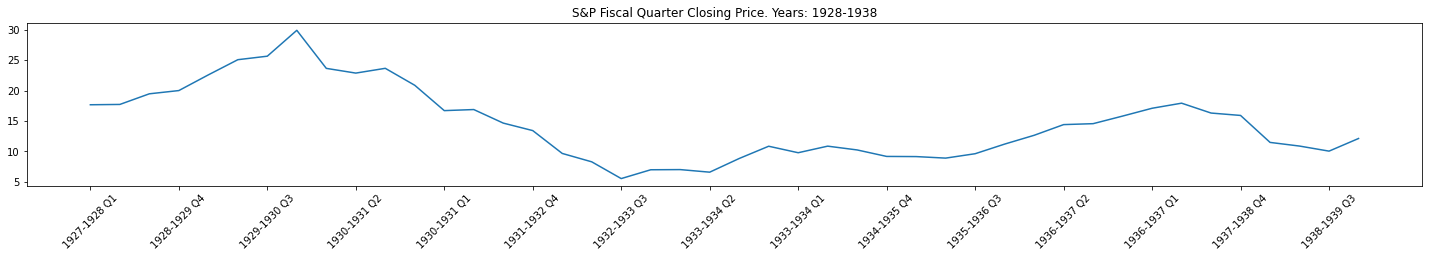

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(25,3))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_28_38_df.index, sp_fiscal_28_38_df["close"])
ax.set_title("S&P Fiscal Quarter Closing Price. Years: 1928-1938")
ax.set_xticks(ax.get_xticks()[::3])
#plt.axvspan(6, 25, color='navy', alpha=0.5)
plt.xticks(rotation = 45)
plt.show()

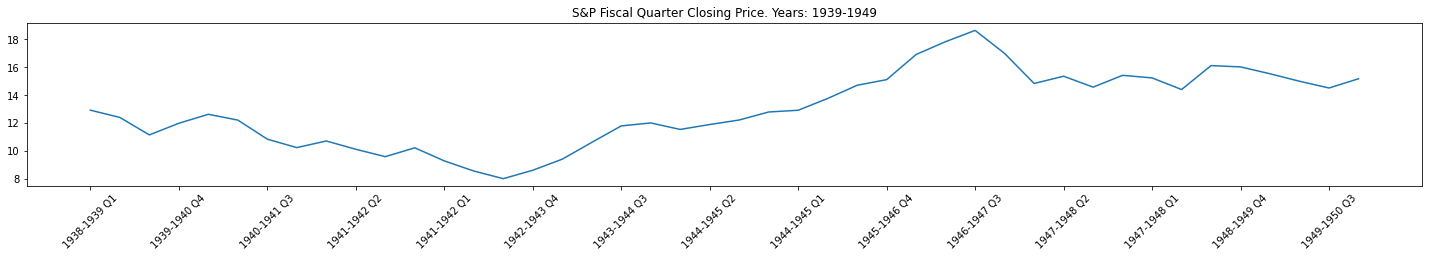

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(25,3))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_39_49_df.index, sp_fiscal_39_49_df["close"])
ax.set_title("S&P Fiscal Quarter Closing Price. Years: 1939-1949")
ax.set_xticks(ax.get_xticks()[::3])
#plt.axvspan(3, 6, color='navy', alpha=0.5)
plt.xticks(rotation = 45)
plt.show()

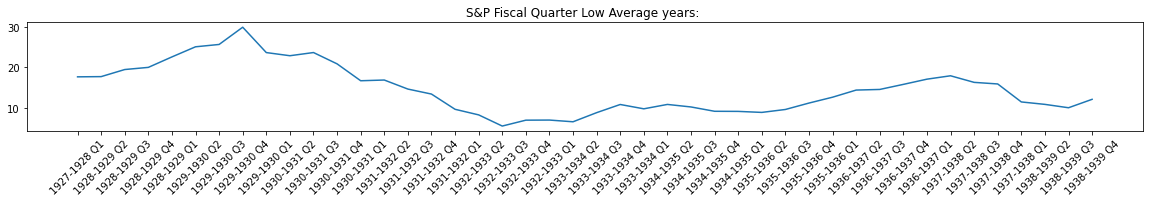

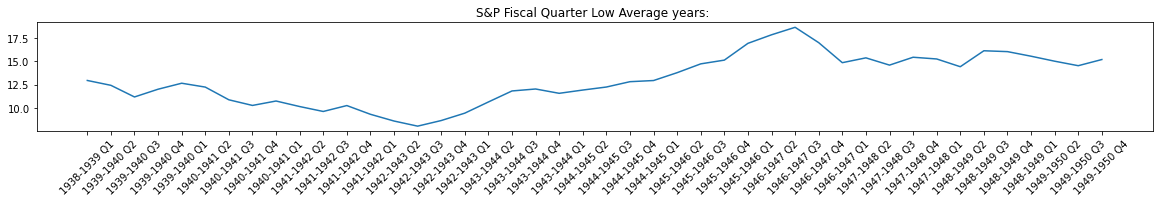

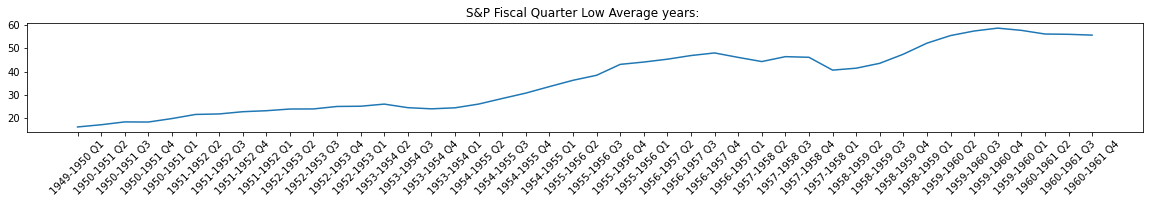

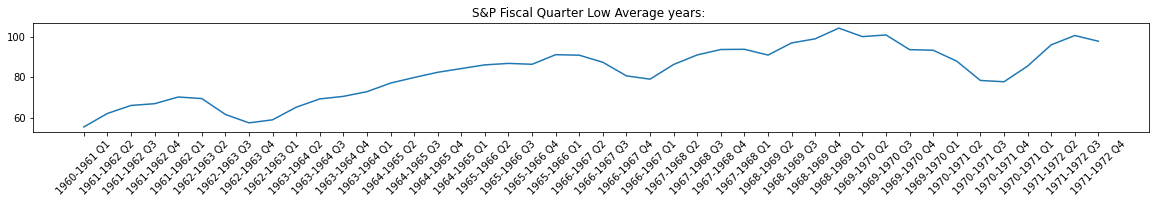

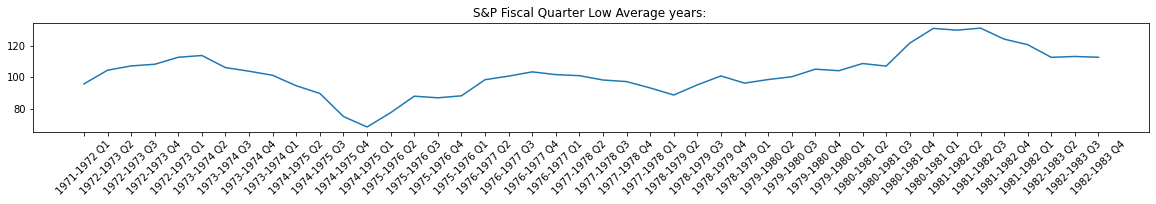

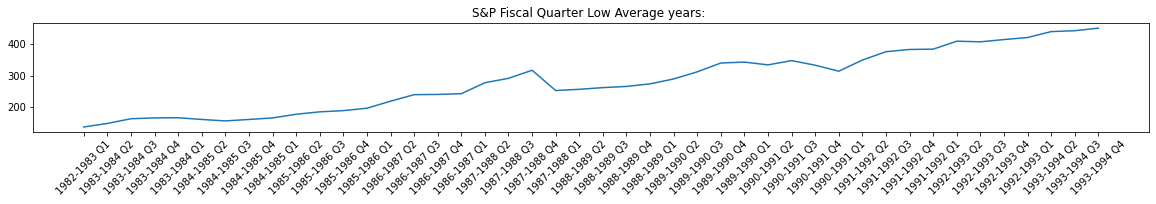

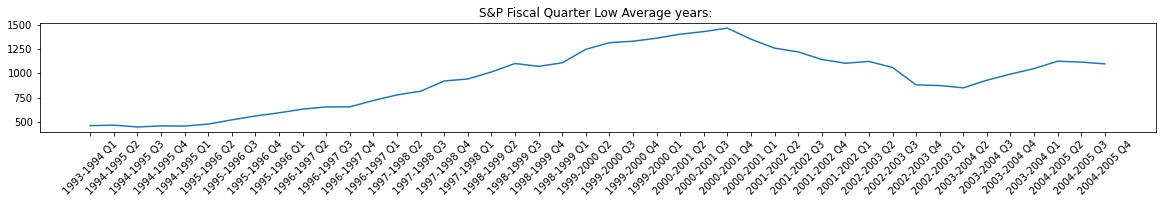

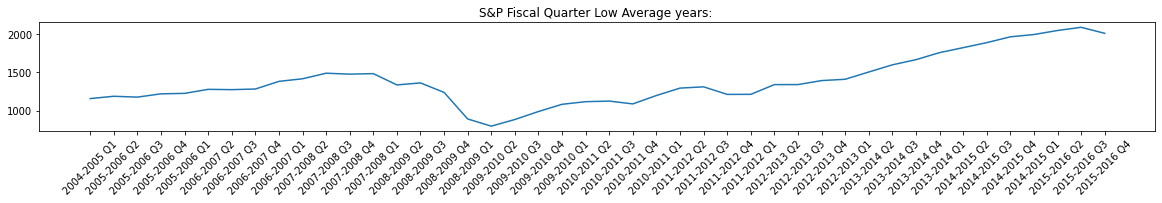

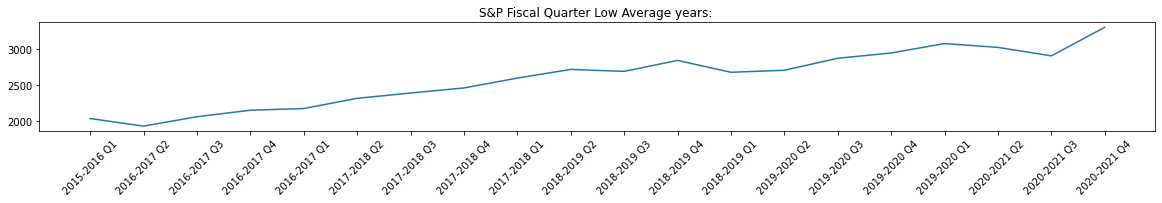

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_28_38_df.index, sp_fiscal_28_38_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_39_49_df.index, sp_fiscal_39_49_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

sp_fiscal_28_38_df = compute_SP_data_by_fiscal_quarter(1928, 1938)
sp_fiscal_39_49_df = compute_SP_data_by_fiscal_quarter(1939, 1949)
sp_fiscal_50_60_df = compute_SP_data_by_fiscal_quarter(1950, 1960)
sp_fiscal_61_71_df = compute_SP_data_by_fiscal_quarter(1961, 1971)
sp_fiscal_72_82_df = compute_SP_data_by_fiscal_quarter(1972, 1982)
sp_fiscal_83_93_df = compute_SP_data_by_fiscal_quarter(1983, 1993)
sp_fiscal_94_04_df = compute_SP_data_by_fiscal_quarter(1994, 2004)
sp_fiscal_05_15_df = compute_SP_data_by_fiscal_quarter(2005, 2015)
sp_fiscal_16_20_df = compute_SP_data_by_fiscal_quarter(2016, 2020)

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_50_60_df.index, sp_fiscal_50_60_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_61_71_df.index, sp_fiscal_61_71_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_72_82_df.index, sp_fiscal_72_82_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_83_93_df.index, sp_fiscal_83_93_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_94_04_df.index, sp_fiscal_94_04_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_05_15_df.index, sp_fiscal_05_15_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.5)
ax.plot(sp_fiscal_16_20_df.index, sp_fiscal_16_20_df["low"])
ax.set_title("S&P Fiscal Quarter Low Average years: ")
#plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [17]:
filename = "SP_500_Daily_Prices_1986_2018.csv"
df = df = pd.read_csv(filename, parse_dates=['date'])
assert get_total_na(df) == 0
summary(df)

head
        date   close
0 1986-01-02  209.59
1 1986-01-03  210.88
2 1986-01-06  210.65
3 1986-01-07  213.80
4 1986-01-08  207.97
tail
           date    close
8187 2018-06-25  2717.07
8188 2018-06-26  2723.06
8189 2018-06-27  2699.63
8190 2018-06-28  2716.31
8191 2018-06-29  2718.37


             close
count  8192.000000
mean   1070.897411
std     616.714534
min     203.490000
25%     458.632500
50%    1106.435000
75%    1388.132500
max    2872.870000


In [19]:
filename = "SP_500_Historical_Data_1927_2020.csv"
df = df = pd.read_csv(filename, parse_dates=['Date'])
assert get_total_na(df) == 0
summary(df)

head
        Date       Open       High        Low      Close  Adj Close  Volume
0 1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0
1 1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0
2 1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0
3 1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0
4 1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0
tail
            Date         Open         High          Low        Close  \
23318 2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107   
23319 2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961   
23320 2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990   
23321 2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912   
23322 2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941   

         Adj Close      Volume  
23318  3310.110107  4903070000  
23319  3269.959961  4840450000  
23

In [20]:
filename = "SPX_500_Daily_Data_1927_2021.csv"
df = df = pd.read_csv(filename, parse_dates=['Date'])
assert get_total_na(df) == 0
summary(df)

head
        Date   Open   High    Low  Close  Adj Close  Volume  \
0 1927-12-30  17.66  17.66  17.66  17.66      17.66       0   
1 1928-01-03  17.76  17.76  17.76  17.76      17.76       0   
2 1928-01-04  17.72  17.72  17.72  17.72      17.72       0   
3 1928-01-05  17.55  17.55  17.55  17.55      17.55       0   
4 1928-01-09  17.50  17.50  17.50  17.50      17.50       0   

   % Gain/Loss (Close)  % Price Variation  
0               0.0000                0.0  
1               0.5631                0.0  
2              -0.2257                0.0  
3              -0.9687                0.0  
4              -0.2857                0.0  
tail
            Date     Open     High      Low    Close  Adj Close      Volume  \
19680 2021-09-13  4474.81  4492.99  4445.70  4468.73    4468.73  3096390000   
19681 2021-09-14  4479.33  4485.68  4435.46  4443.05    4443.05  2568730000   
19682 2021-09-15  4447.49  4486.87  4438.37  4480.70    4480.70  3154760000   
19683 2021-09-16  4477.09  4485

In [73]:
filename = "Daily Treasury Real Yield Curve.csv"
df = df = pd.read_csv(filename, parse_dates=['DATE'])
#assert get_total_na(df) == 0
print(get_total_na(df))
summary(df)

1785
head
        DATE  5 YR  7 YR  10 YR  20 YR  30 YR
0 2003-01-02  1.75  2.24   2.43    NaN    NaN
1 2003-01-03  1.75  2.25   2.43    NaN    NaN
2 2003-01-06  1.79  2.27   2.46    NaN    NaN
3 2003-01-07  1.76  2.24   2.42    NaN    NaN
4 2003-01-08  1.68  2.14   2.29    NaN    NaN
tail
           DATE  5 YR  7 YR  10 YR  20 YR  30 YR
4373 2020-06-24 -0.77 -0.72  -0.64  -0.38  -0.14
4374 2020-06-25 -0.79 -0.73  -0.65  -0.40  -0.16
4375 2020-06-26 -0.81 -0.76  -0.68  -0.43  -0.20
4376 2020-06-29 -0.86 -0.80  -0.70  -0.41  -0.18
4377 2020-06-30 -0.87 -0.79  -0.68  -0.38  -0.15


              5 YR         7 YR        10 YR        20 YR        30 YR
count  4378.000000  4378.000000  4378.000000  3987.000000  2593.000000
mean      0.548659     0.802296     1.014600     1.280110     1.004026
std       1.005042     0.950375     0.902698     0.793262     0.465007
min      -1.670000    -1.330000    -0.870000    -0.430000    -0.260000
25%      -0.120000     0.190000     0.370000     0.680000 

In [74]:
filename = "10-year treasury yields data.csv"
df = df = pd.read_csv(filename, parse_dates=['DATE'])
#assert get_total_na(df) == 0
print(get_total_na(df))
summary(df)

0
head
        DATE DGS10
0 1962-01-02  4.06
1 1962-01-03  4.03
2 1962-01-04  3.99
3 1962-01-05  4.02
4 1962-01-08  4.03
tail
            DATE DGS10
15425 2021-02-16  1.30
15426 2021-02-17  1.29
15427 2021-02-18  1.29
15428 2021-02-19  1.34
15429 2021-02-22  1.37


                       DATE  DGS10
count                 15430  15430
unique                15430   1383
top     1962-01-02 00:00:00      .
freq                      1    661
first   1962-01-02 00:00:00    NaN
last    2021-02-22 00:00:00    NaN


In [78]:
filename = "Daily Treasury Real Yield Curve.csv"
df = df = pd.read_csv(filename, parse_dates=['DATE'])
#assert get_total_na(df) == 0
print(get_total_na(df))
summary(df)

1785
head
        DATE  5 YR  7 YR  10 YR  20 YR  30 YR
0 2003-01-02  1.75  2.24   2.43    NaN    NaN
1 2003-01-03  1.75  2.25   2.43    NaN    NaN
2 2003-01-06  1.79  2.27   2.46    NaN    NaN
3 2003-01-07  1.76  2.24   2.42    NaN    NaN
4 2003-01-08  1.68  2.14   2.29    NaN    NaN
tail
           DATE  5 YR  7 YR  10 YR  20 YR  30 YR
4373 2020-06-24 -0.77 -0.72  -0.64  -0.38  -0.14
4374 2020-06-25 -0.79 -0.73  -0.65  -0.40  -0.16
4375 2020-06-26 -0.81 -0.76  -0.68  -0.43  -0.20
4376 2020-06-29 -0.86 -0.80  -0.70  -0.41  -0.18
4377 2020-06-30 -0.87 -0.79  -0.68  -0.38  -0.15


              5 YR         7 YR        10 YR        20 YR        30 YR
count  4378.000000  4378.000000  4378.000000  3987.000000  2593.000000
mean      0.548659     0.802296     1.014600     1.280110     1.004026
std       1.005042     0.950375     0.902698     0.793262     0.465007
min      -1.670000    -1.330000    -0.870000    -0.430000    -0.260000
25%      -0.120000     0.190000     0.370000     0.680000 

In [81]:
print("Initial index ", df.index)
print("dtypes ", df.dtypes)
print("Set index to Date")
df.set_index("DATE", inplace=True)

Initial index  RangeIndex(start=0, stop=4378, step=1)
dtypes  DATE     datetime64[ns]
5 YR            float64
7 YR            float64
10 YR           float64
20 YR           float64
30 YR           float64
dtype: object
Set index to Date


In [82]:
df

,5 YR,7 YR,10 YR,20 YR,30 YR
DATE,,,,,
2003-01-02,1.75,2.24,2.43,NaN,NaN
2003-01-03,1.75,2.25,2.43,NaN,NaN
2003-01-06,1.79,2.27,2.46,NaN,NaN
2003-01-07,1.76,2.24,2.42,NaN,NaN
2003-01-08,1.68,2.14,2.29,NaN,NaN
...,...,...,...,...,...
2020-06-24,-0.77,-0.72,-0.64,-0.38,-0.14
2020-06-25,-0.79,-0.73,-0.65,-0.40,-0.16
2020-06-26,-0.81,-0.76,-0.68,-0.43,-0.20


In [83]:
df.head(100)

,5 YR,7 YR,10 YR,20 YR,30 YR
DATE,,,,,
2003-01-02,1.75,2.24,2.43,NaN,NaN
2003-01-03,1.75,2.25,2.43,NaN,NaN
2003-01-06,1.79,2.27,2.46,NaN,NaN
2003-01-07,1.76,2.24,2.42,NaN,NaN
2003-01-08,1.68,2.14,2.29,NaN,NaN
...,...,...,...,...,...
2003-05-20,0.99,1.44,1.73,NaN,NaN
2003-05-21,1.03,1.44,1.73,NaN,NaN
2003-05-22,1.02,1.45,1.71,NaN,NaN


In [84]:
df.tail(100)

,5 YR,7 YR,10 YR,20 YR,30 YR
DATE,,,,,
2020-02-07,-0.20,-0.15,-0.07,0.15,0.31
2020-02-10,-0.24,-0.18,-0.10,0.14,0.30
2020-02-11,-0.20,-0.14,-0.06,0.17,0.34
2020-02-12,-0.19,-0.12,-0.04,0.20,0.36
2020-02-13,-0.22,-0.15,-0.06,0.18,0.33
...,...,...,...,...,...
2020-06-24,-0.77,-0.72,-0.64,-0.38,-0.14
2020-06-25,-0.79,-0.73,-0.65,-0.40,-0.16
2020-06-26,-0.81,-0.76,-0.68,-0.43,-0.20


In [89]:
def compute_Treasury_Yield_by_fiscal_quarter(start_year, end_year):
  open = compute_quarter_avg(df, "10 YR", start_year, end_year)
  
  open = pd.Series(open.values(), name="open")
  
  fiscal_quarter_open = pd.Series(open.values(), name="open")
  fiscal_quarter_open.index = pd.Index(list(open.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_df = pd.DataFrame([fiscal_quarter_open]).T
  return fiscal_quarter_df

print(compute_Treasury_Yield_by_fiscal_quarter(2004, 2020))


TypeError: ignored

In [85]:
df.head(100)

,5 YR,7 YR,10 YR,20 YR,30 YR
DATE,,,,,
2003-01-02,1.75,2.24,2.43,NaN,NaN
2003-01-03,1.75,2.25,2.43,NaN,NaN
2003-01-06,1.79,2.27,2.46,NaN,NaN
2003-01-07,1.76,2.24,2.42,NaN,NaN
2003-01-08,1.68,2.14,2.29,NaN,NaN
...,...,...,...,...,...
2003-05-20,0.99,1.44,1.73,NaN,NaN
2003-05-21,1.03,1.44,1.73,NaN,NaN
2003-05-22,1.02,1.45,1.71,NaN,NaN


In [163]:
filename = "Daily Treasury Real Yield Curve.csv"
df = df = pd.read_csv(filename, parse_dates=['DATE'])
df.set_index("DATE", inplace=True)

def compute_Treasury_Yield_by_fiscal_quarter(start_year, end_year):
  open = compute_quarter_avg(df, "10 YR", start_year, end_year)
  
  fiscal_quarter_open = pd.Series(open.values(), name="open")
  fiscal_quarter_open.index = pd.Index(list(open.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_df = pd.DataFrame([fiscal_quarter_open]).T
  return fiscal_quarter_df
  
treasury_yield = compute_Treasury_Yield_by_fiscal_quarter(2004, 2014)

In [164]:
df = load_data("SP_500_Historical_Data_1927_2020.csv")
df.set_index("Date", inplace=True)

def compute_SP_data_by_fiscal_quarter(start_year, end_year):
  
  close = compute_quarter_avg(df, "Close", start_year, end_year)
  adj_close = compute_quarter_avg(df, "Adj Close", start_year, end_year)
  volume = compute_quarter_avg(df, "Volume", start_year, end_year)
  
  
  fiscal_quarter_close = pd.Series(close.values(), name="close")
  fiscal_quarter_close.index = pd.Index(list(close.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_adj_close = pd.Series(adj_close.values(), name="adj_close")
  fiscal_quarter_adj_close.index = pd.Index(list(adj_close.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_volume = pd.Series(volume.values(), name="volume")
  fiscal_quarter_volume.index = pd.Index(list(volume.keys()), name = "Fiscal_Quarter")

  fiscal_quarter_df = pd.DataFrame([fiscal_quarter_close,
                                    fiscal_quarter_adj_close, fiscal_quarter_volume]).T
  return fiscal_quarter_df
  
sp_fiscal_16_20_df = compute_SP_data_by_fiscal_quarter(2004, 2014)
print(sp_fiscal_16_20_df)

                      close    adj_close        volume
Fiscal_Quarter                                        
2003-2004 Q1    1056.452501  1056.452501  1.321888e+09
2004-2005 Q2    1132.671286  1132.671286  1.522637e+09
2004-2005 Q3    1123.196456  1123.196456  1.426900e+09
2004-2005 Q4    1103.908279  1103.908279  1.292223e+09
2004-2005 Q1    1162.652033  1162.652033  1.454278e+09
2005-2006 Q2    1191.947868  1191.947868  1.636235e+09
2005-2006 Q3    1181.974056  1181.974056  1.923130e+09
2005-2006 Q4    1224.174377  1224.174377  1.941754e+09
2005-2006 Q1    1230.468254  1230.468254  2.169092e+09
2006-2007 Q2    1283.655002  1283.655002  2.306075e+09
2006-2007 Q3    1280.811744  1280.811744  2.420548e+09
2006-2007 Q4    1288.317307  1288.317307  2.314846e+09
2006-2007 Q1    1388.635393  1388.635393  2.535180e+09
2007-2008 Q2    1424.381312  1424.381312  2.887761e+09
2007-2008 Q3    1497.176188  1497.176188  2.973227e+09
2007-2008 Q4    1489.463495  1489.463495  3.484586e+09
2007-2008 

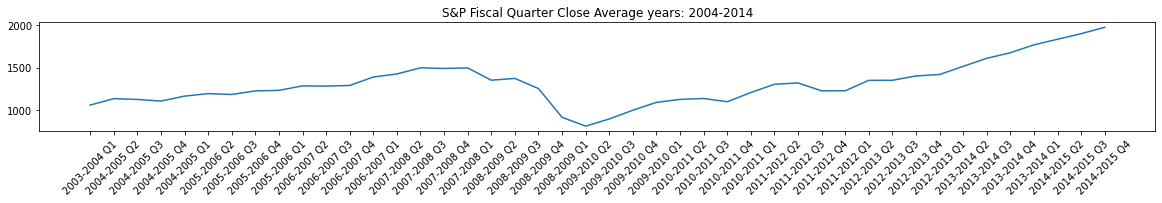

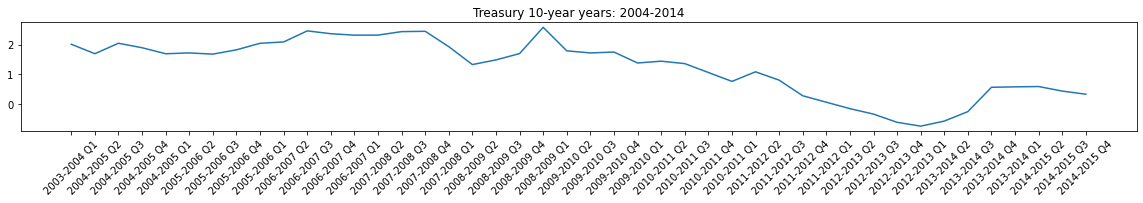

In [165]:
fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(sp_fiscal_16_20_df.index, sp_fiscal_16_20_df["close"])
ax.set_title("S&P Fiscal Quarter Close Average years: 2004-2014")
plt.xticks(rotation = 45)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(treasury_yield.index, treasury_yield["open"])
ax.set_title("Treasury 10-year years: 2004-2014")
plt.xticks(rotation = 45)
plt.show()

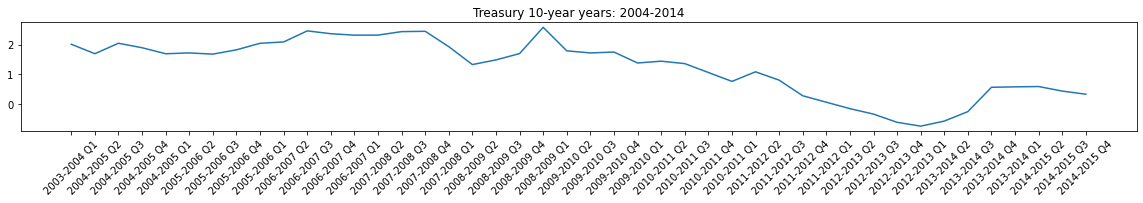

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(treasury_yield.index, treasury_yield["open"])
ax.set_title("Treasury 10-year years: 2004-2014")
plt.xticks(rotation = 45)
plt.show()

In [167]:
print(treasury_yield)

                    open
Fiscal_Quarter          
2003-2004 Q1    2.010806
2004-2005 Q2    1.692419
2004-2005 Q3    2.045645
2004-2005 Q4    1.893750
2004-2005 Q1    1.690484
2005-2006 Q2    1.717705
2005-2006 Q3    1.677812
2005-2006 Q4    1.822812
2005-2006 Q1    2.044426
2006-2007 Q2    2.090161
2006-2007 Q3    2.463968
2006-2007 Q4    2.368571
2006-2007 Q1    2.319032
2007-2008 Q2    2.321129
2007-2008 Q3    2.439062
2007-2008 Q4    2.449841
2007-2008 Q1    1.928871
2008-2009 Q2    1.324098
2008-2009 Q3    1.481719
2008-2009 Q4    1.696406
2008-2009 Q1    2.585161
2009-2010 Q2    1.789016
2009-2010 Q3    1.717937
2009-2010 Q4    1.747344
2009-2010 Q1    1.377419
2010-2011 Q2    1.438852
2010-2011 Q3    1.356406
2010-2011 Q4    1.056719
2010-2011 Q1    0.754677
2011-2012 Q2    1.079032
2011-2012 Q3    0.797460
2011-2012 Q4    0.268906
2011-2012 Q1    0.050656
2012-2013 Q2   -0.167097
2012-2013 Q3   -0.351719
2012-2013 Q4   -0.629524
2012-2013 Q1   -0.759344
2013-2014 Q2   -0.588667


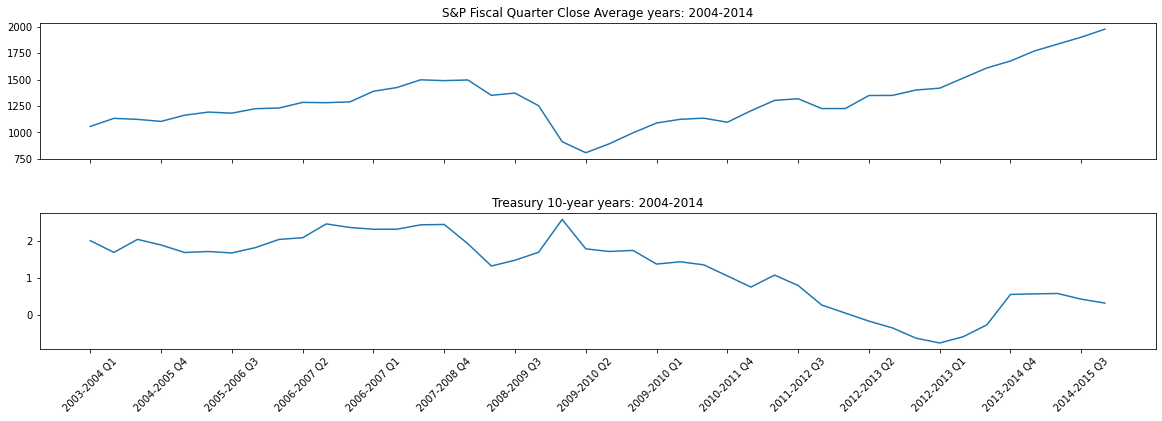

In [170]:
fig, ax = plt.subplots(2, 1, figsize=(20,6), sharex=True)
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 0.4)
ax[0].plot(sp_fiscal_16_20_df.index, sp_fiscal_16_20_df["close"])
ax[0].set_title("S&P Fiscal Quarter Close Average years: 2004-2014")

#plt.xticks(rotation = 45)
#plt.show()


#fig, ax = plt.subplots(1, 1, figsize=(20,2))
#fig.subplots_adjust(wspace = 0.4)
#fig.subplots_adjust(hspace = 2.5)
ax[1].plot(treasury_yield.index, treasury_yield["open"])
ax[1].set_title("Treasury 10-year years: 2004-2014")
ax[1].set_xticks(ax[1].get_xticks()[::3])
plt.xticks(rotation = 45)
plt.show()